In [ ]:
from keras.models import Sequential
import pathlib
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50 
#,NASNetLarge
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")
import os
from keras.models import Model
from tensorflow.keras.optimizers import Adam

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

#from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam ,RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_path = pathlib.Path('/content/drive/MyDrive/Test')
train_path = pathlib.Path('/content/drive/MyDrive/Train')

In [ ]:
train_image_len = len(list(train_path.glob('*/*.jpg')))
print(train_image_len)

test_image_len = len(list(test_path.glob('*/*.jpg')))
print(test_image_len)

1846
101


In [ ]:
batch_size = 32
img_h = 180
img_w = 180

In [ ]:
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_h, img_w),
    batch_size = batch_size)

Found 1846 files belonging to 9 classes.
Using 1477 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_h, img_w),
    batch_size = batch_size
)

Found 1846 files belonging to 9 classes.
Using 369 files for validation.


In [ ]:
c_names = train_ds.class_names
print(c_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


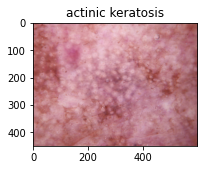

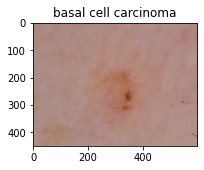

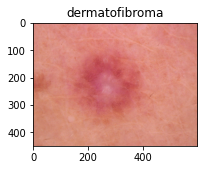

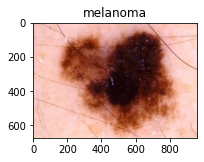

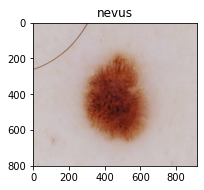

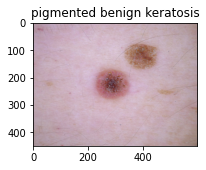

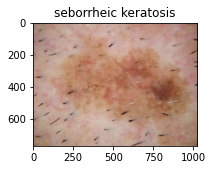

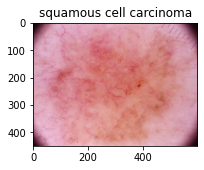

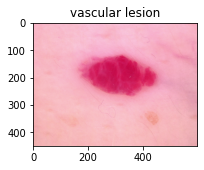

In [ ]:
for i in range(9): 
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(str(list(train_path.glob(c_names[i]+'/*.jpg'))[2]))
    plt.title(c_names[i])
    plt.imshow(img)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
n_c = 9

''' preprocessing layer '''
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_h, img_w,3))])

''' Convolutional Layers '''
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' Classification Layer'''
model.add(Dense(n_c, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [ ]:
epochs=30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
47/47 [==============================] - 419s 9s/step - loss: 2.0759 - accuracy: 0.1984 - val_loss: 2.0008 - val_accuracy: 0.2222
Epoch 2/30
47/47 [==============================] - 350s 7s/step - loss: 2.0249 - accuracy: 0.2065 - val_loss: 1.9817 - val_accuracy: 0.2222
Epoch 3/30
47/47 [==============================] - 352s 7s/step - loss: 2.0175 - accuracy: 0.2437 - val_loss: 2.0073 - val_accuracy: 0.2439
Epoch 4/30
47/47 [==============================] - 349s 7s/step - loss: 1.9948 - accuracy: 0.2376 - val_loss: 2.0151 - val_accuracy: 0.2114
Epoch 5/30
47/47 [==============================] - 347s 7s/step - loss: 2.0255 - accuracy: 0.2167 - val_loss: 2.0058 - val_accuracy: 0.2222
Epoch 6/30
47/47 [==============================] - 352s 8s/step - loss: 2.0172 - accuracy: 0.2227 - val_loss: 1.9948 - val_accuracy: 0.2222
Epoch 7/30
47/47 [==============================] - 347s 8s/step - loss: 2.0181 - accuracy: 0.2227 - val_loss: 1.9926 - val_accuracy: 0.2222
Epoch 8/30
47

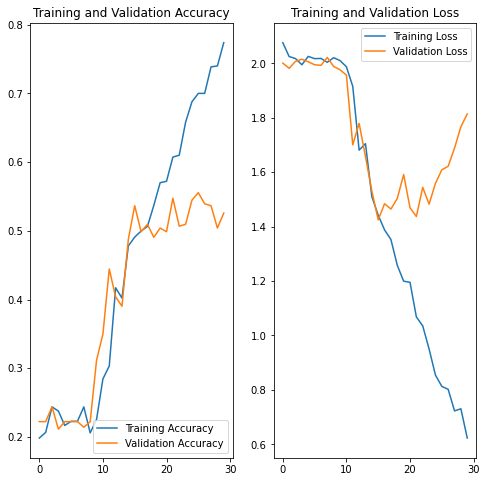

In [ ]:
 ''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
augmentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", 
                                                                          input_shape=(img_h,img_w,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')])

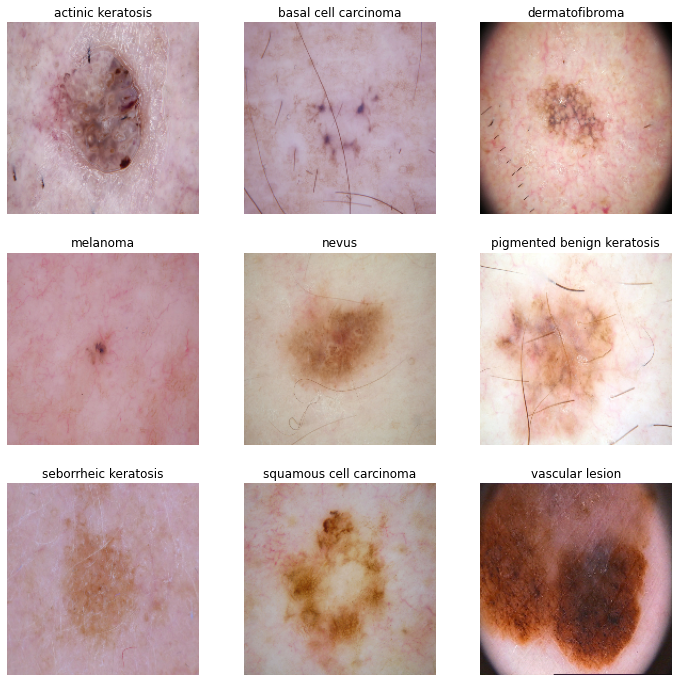

In [ ]:
''' ploting some augmented images '''
for img, lbls in train_ds.take(1):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmentation(img)[i].numpy().astype("uint8"))
        plt.title(c_names[i])
        plt.axis("off")

In [ ]:
''' Model with Augmentation '''
n_classes = 9

''' preprocess layer '''
model = Sequential([augmentation, layers.experimental.preprocessing.Rescaling(1./255, 
                                                                              input_shape=(img_h, img_w,3))])
''' Convolutional layers '''
model.add(Conv2D(filters = 32, kernel_size=(5,5), padding='Same',  activation ='relu', input_shape=(180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size=(5,5),padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' classification layer '''
model.add(Dense(n_classes, activation = "softmax"))


In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
epochs=30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
47/47 [==============================] - 358s 8s/step - loss: 2.0598 - accuracy: 0.2045 - val_loss: 1.9886 - val_accuracy: 0.2222
Epoch 2/30
47/47 [==============================] - 359s 8s/step - loss: 2.0135 - accuracy: 0.2397 - val_loss: 1.9942 - val_accuracy: 0.2249
Epoch 3/30
47/47 [==============================] - 356s 8s/step - loss: 2.0326 - accuracy: 0.2424 - val_loss: 1.9994 - val_accuracy: 0.2141
Epoch 4/30
47/47 [==============================] - 351s 7s/step - loss: 2.0290 - accuracy: 0.2126 - val_loss: 1.9906 - val_accuracy: 0.2222
Epoch 5/30
47/47 [==============================] - 350s 7s/step - loss: 2.0163 - accuracy: 0.2255 - val_loss: 1.9885 - val_accuracy: 0.2846
Epoch 6/30
47/47 [==============================] - 353s 8s/step - loss: 2.0142 - accuracy: 0.2404 - val_loss: 1.9832 - val_accuracy: 0.2520
Epoch 7/30
47/47 [==============================] - 354s 8s/step - loss: 2.0057 - accuracy: 0.2431 - val_loss: 1.9566 - val_accuracy: 0.2304
Epoch 8/30
47

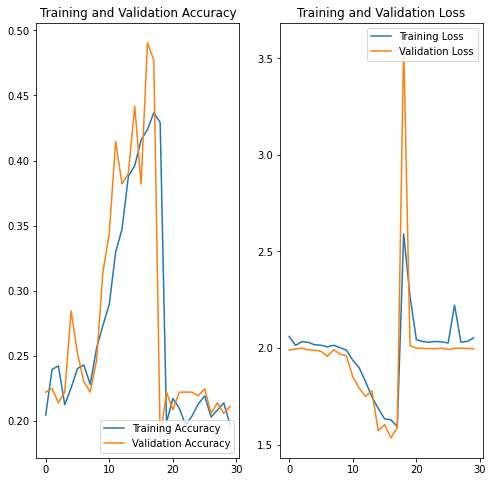

In [37]:
''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
p_list=[]
l_list=[]
for i in c_names:
    for j in train_path.glob(i+'/*.jpg'):
        p_list.append(str(j))
        l_list.append(i)
        
df_dict = dict(zip(p_list, l_list))
org_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
org_df

,Path,Label
0,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
1,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
2,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
3,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
4,/content/drive/MyDrive/Train/actinic keratosis...,actinic keratosis
...,...,...
1841,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion
1842,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion
1843,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion
1844,/content/drive/MyDrive/Train/vascular lesion/I...,vascular lesion


<BarContainer object of 9 artists>

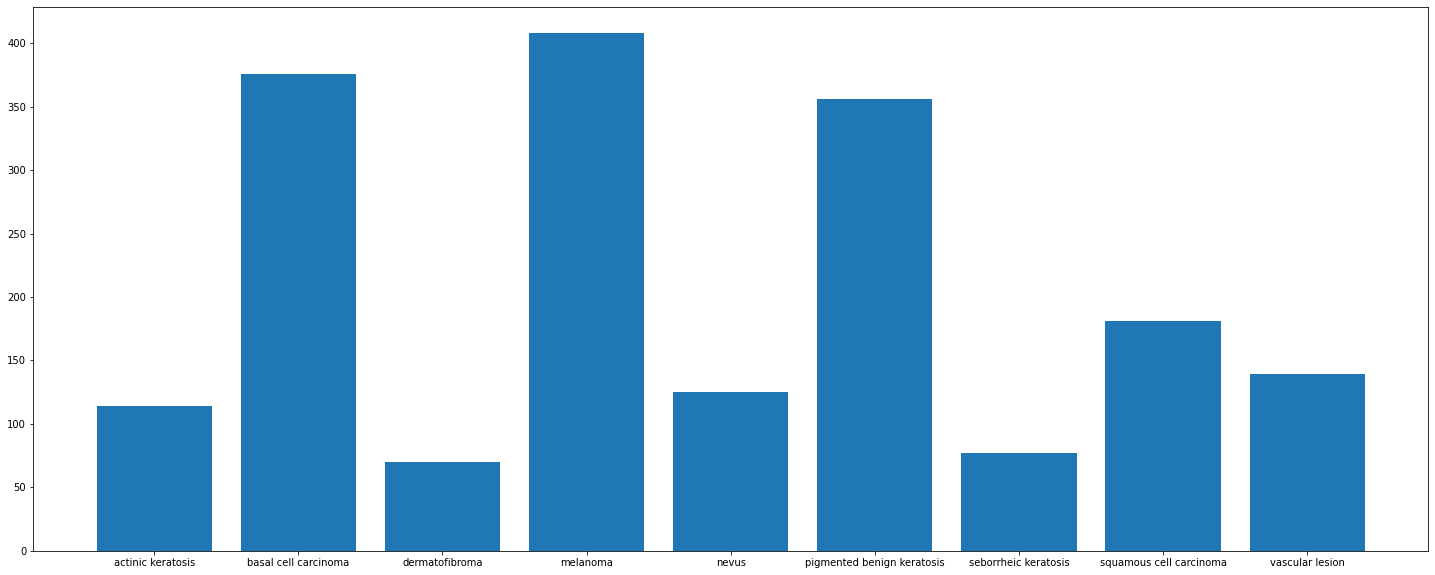

In [41]:
count=[]
for i in c_names:
    count.append(len(list(train_path.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(c_names,count)